##### Name: Shelmith Nyagathiri Kariuki
##### Project: PRS (Self Development)
##### Task Number: Task Number 2 (Loops and Functions)
##### Date: 15/08/2018

In [1]:
# Task Instructions
# 1. Generate a simulated dataset of 500 individuals, from different countries, with the following fields: ID, County, Gender, Age, Education Level and Income Level
# 2. Generate a variable called ‘JINSIA’ = “mwanamke” if Gender is female, and “mwanamme” otherwise.
# 3. Generate a binary income level, if income level is <50000 , ‘low’, ‘high’
# 4. Write a function that displays frequency tables, and bar graphs, of the categorical variables,and saves them in a folder.
# 5. Write a function that displays summary statistics and scatter plots of the continuous variables, and saves them in a different folder.


In [2]:
## Import the required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.defchararray import add
import seaborn as sns


In [3]:
## Set the working directory
os.getcwd()
#os.chdir()

'/Users/shelmith/Documents/Github/python'

In [4]:
##1.Generate a simulated dataset of 500 individuals, from different countries, with the following fields: 
### ID, County, Gender, Age, Education Level and Income Level
sid = add("sid_",np.arange(1,501).astype(str))
county = np.random.choice(['Nyeri','Kirinyaga','Embu','Mombasa','Kitui','Garissa','Wajir','Kisumu'],size=len(sid))
gender = np.random.choice(['Male','Female'],size = len(sid))
age = np.random.choice(range(18,65,2),size = len(sid))
educ = np.random.choice(['None','Primary',"Secondary",'Diploma','Degree'],size = len(sid))
income = np.random.choice(range(10000,100000,576),size=len(sid))

Nyagathiri = pd.DataFrame({'Sid':sid, 'County':county,'Gender':gender,'Age':age,'Education':educ,'Income':income})
Nyagathiri.head(n=5)

Nyagathiri.Education = pd.Categorical(Nyagathiri.Education,['None','Primary',"Secondary",'Diploma','Degree'])
Nyagathiri.Gender = pd.Categorical(Nyagathiri.Gender,['Male','Female'])


In [5]:
##2. Generate a variable called ‘JINSIA’ = “Kike” if Gender is female, and “Kiume” otherwise.
Nyagathiri['Jinsia']=np.where(Nyagathiri.Gender=='Female','Kike',"Kiume")

In [6]:
##3. Generate a binary income level, if income level is <50000 , ‘low’, ‘high’
Nyagathiri['Income2'] = np.where(Nyagathiri.Income<50000,'Low','High')


In [7]:
# 4. Write a function that displays frequency tables
for col in Nyagathiri.columns:
    if (Nyagathiri[col].dtypes !='int64') and col!='Sid':
        tab=pd.DataFrame(Nyagathiri[col].value_counts().reset_index())
        tab.columns=[col,'Frequency']
        print(tab)

      County  Frequency
0      Wajir         75
1  Kirinyaga         69
2      Nyeri         64
3     Kisumu         62
4      Kitui         60
5       Embu         59
6    Garissa         57
7    Mombasa         54
   Gender  Frequency
0    Male        262
1  Female        238
   Education  Frequency
0  Secondary        113
1     Degree        104
2    Diploma        100
3       None         94
4    Primary         89
  Jinsia  Frequency
0  Kiume        262
1   Kike        238
  Income2  Frequency
0    High        274
1     Low        226


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


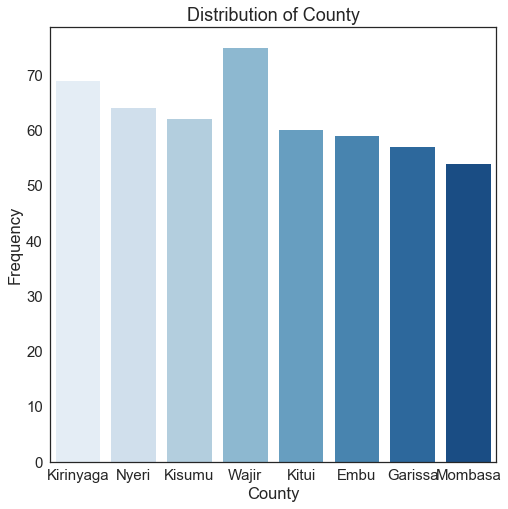

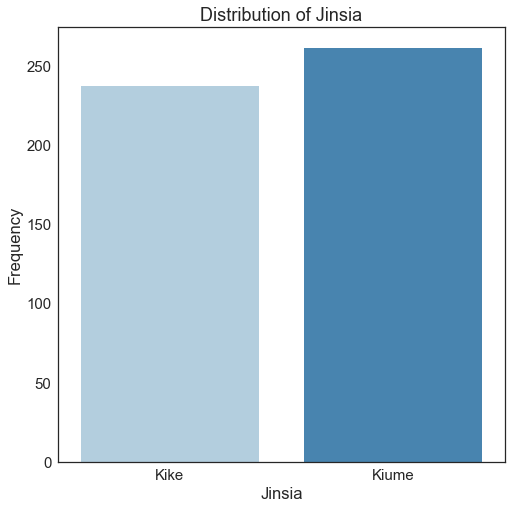

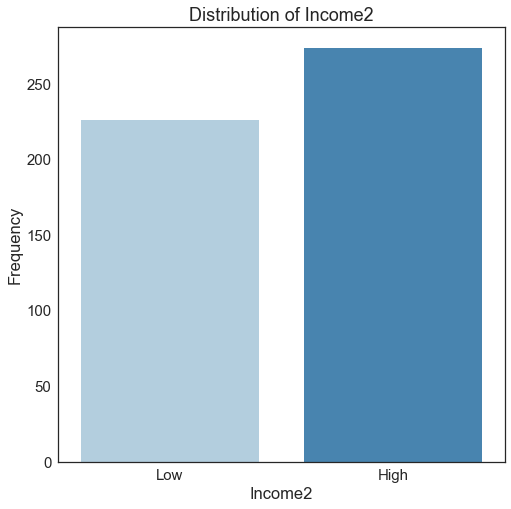

In [8]:
# 4b.Write a function that plots bar graphs, of the categorical variables 
for col in Nyagathiri.columns:
    if Nyagathiri[col].dtypes == 'object' and col !='Sid':
        plt.figure(figsize = (8,8))
        sns.set(font='sans-serif', font_scale=1.5,style = "white")
        ax = sns.countplot(x=col,data = Nyagathiri,palette = "Blues")
        ax.set(title = 'Distribution of ' + col, xlabel = col, ylabel='Frequency')
        fig = ax.get_figure()
        fig.savefig("/Users/shelmith/Documents/Personal Development/Python/Output/" +col+".png")
        print(ax)
        

In [9]:
# 5. Write a function that displays summary statistics.
for col in Nyagathiri.columns:
    if Nyagathiri[col].dtypes=='int64':
        tab=pd.DataFrame(Nyagathiri[col].describe().reset_index())
        tab.columns = [col,'Measure']
        print(tab)

     Age     Measure
0  count  500.000000
1   mean   40.724000
2    std   13.506468
3    min   18.000000
4    25%   28.000000
5    50%   42.000000
6    75%   52.000000
7    max   64.000000
  Income       Measure
0  count    500.000000
1   mean  54567.424000
2    std  25471.480527
3    min  10000.000000
4    25%  32320.000000
5    50%  53488.000000
6    75%  75808.000000
7    max  99856.000000


AxesSubplot(0.125,0.125;0.775x0.755)


/Users/shelmith/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/shelmith/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AxesSubplot(0.125,0.125;0.775x0.755)


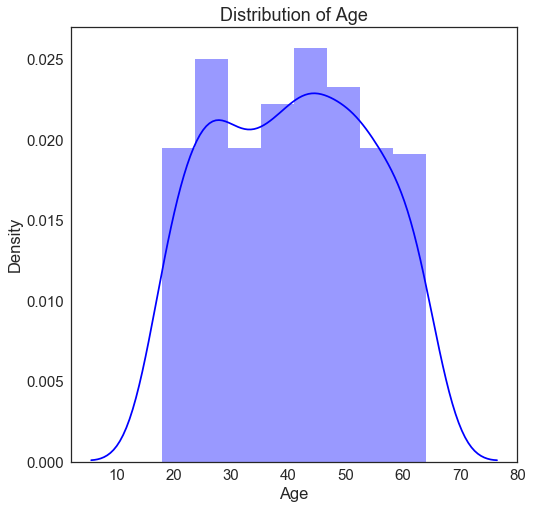

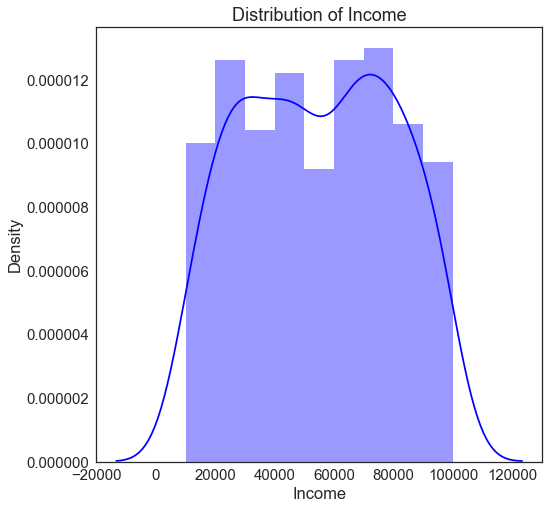

In [10]:
# 5b. Histograms of continuous variables
for col in Nyagathiri.columns:
    if Nyagathiri[col].dtypes=='int64':
        plt.figure(figsize = (8,8))
        sns.set(font='sans-serif', font_scale=1.5,style = "white")
        ax=sns.distplot(Nyagathiri[col],color="blue")
        ax.set(title = 'Distribution of '+col,xlabel = col,ylabel='Density')
        fig = ax.get_figure()
        fig.savefig("/Users/shelmith/Documents/Personal Development/Python/Output/" +col+".png")
        print(ax)

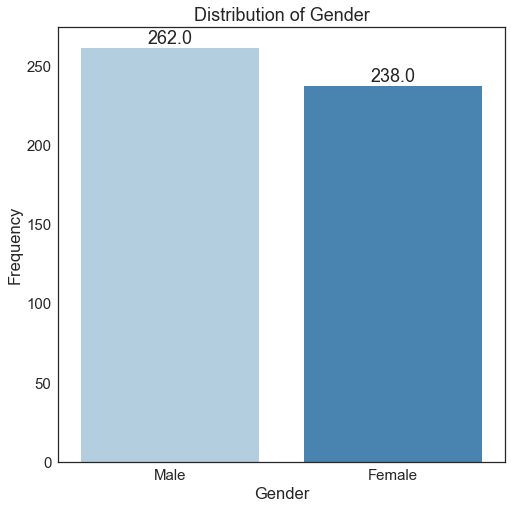

In [11]:
plt.figure(figsize = (8,8))
sns.set(font='sans-serif', font_scale=1.5,style = "white")
ax = sns.countplot(x=Nyagathiri.Gender,data = Nyagathiri,palette = "Blues")
ax.set(title = 'Distribution of Gender', xlabel = 'Gender', ylabel='Frequency')

rects = ax.patches
# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 0
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.


